In [1]:
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
df_can = pd.read_excel ('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
sheet_name='Canada by Citizenship',
skiprows=range(20),
skipfooter=2)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df_can.shape

(195, 43)

In [4]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [6]:
df_can.set_index('Country', inplace=True)

In [7]:
df_can['Total'] = df_can.sum(axis=1)

C:\Users\HP\AppData\Local\Temp/ipykernel_2468/552165185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [8]:
df_can.shape

(195, 38)

In [9]:
years = list(map(str, range(1980, 2014)))

# Waffle Charts

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatchest

mpl.style.use('ggplot')

In [11]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [12]:
#step 1 : menentukan proporsi setiap kategori sehubungan dengan total

total_values = sum(df_dsn['Total'])
category_proportion = [(float(value)/total_values) for value in df_dsn['Total']] 

for i, proportion in enumerate (category_proportion):
    print(df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [13]:
#step 2 : menentukan ukuran keseluruhan  waffle chart

width = 40
height = 10

total_num_tiles = width * height

In [14]:
#step 3 : menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori

tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportion]

for i, tiles in enumerate (tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [15]:
#step 4 : membuat matriks yang menyerupai wafel

waffle_chart = np.zeros((height, width)) #inisialisasi wafle sebagai matriks kosong

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1

        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        
        waffle_chart[row, col] = category_index
print('waffle chart populated!')

waffle chart populated!


In [16]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

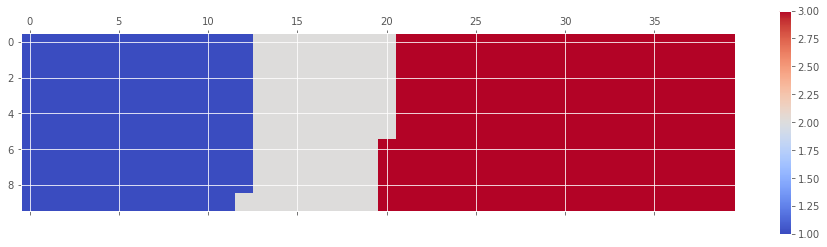

In [17]:
#step 5 : petakan matriks waffle chart menjadi visual

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

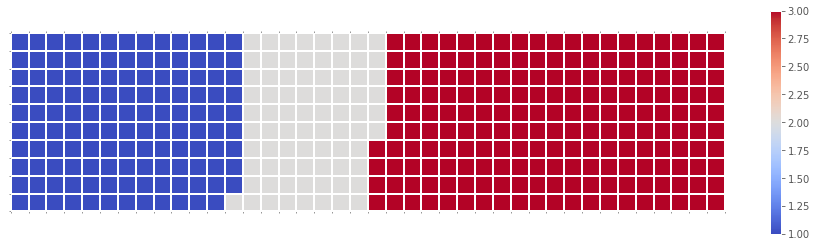

In [18]:
# step 6 : percantik chart
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
 
ax = plt.gca() # set axis

## set minor tricks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

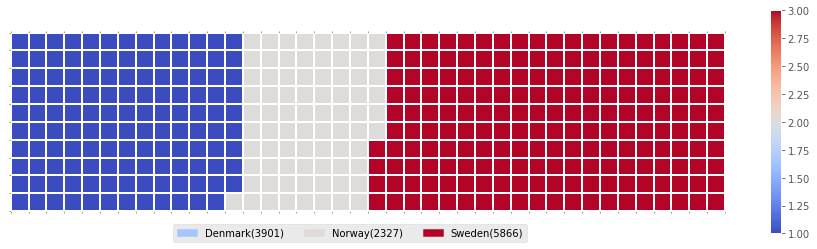

In [19]:
# step 7 : tambahkan legend

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
 
ax = plt.gca() # set axis

## set minor tricks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

## menghitung jumlah kategori individu untuk mencocokan warna
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum)-1]

## membuat legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + '(' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatchest.Patch(color = color_val, label = label_str))

## add legend to chart
plt.legend(handles = legend_handles, 
            loc = 'lower center',
            ncol = len(df_dsn.index.values),
            bbox_to_anchor = (0., -0.2, 0.95, .1))


## fungsi waffle chart

In [20]:
def create_waffle_chart (categories, values, height, width, colormap, value_sign=''):
    total_values = sum(values)
    category_proportion = [(float(value)/total_values) for value in values] 

    total_num_tiles = width * height

    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportion]
    
    for i, tiles in enumerate (tiles_per_category):
        print(df_dsn.index.values[i] + ':' + str(tiles))
    
    waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
            
            waffle_chart[row, col] = category_index
   
    fig = plt.figure()

    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca() # set axis

    ## set minor tricks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum)-1]

    ## membuat legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign =='%':
            label_str = category + '(' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + '(' + value_sign + str(values[i]) + ')'
        
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatchest.Patch(color = color_val, label = label_str))

    ## add legend to chart
    plt.legend(handles = legend_handles, 
                loc = 'lower center',
                ncol = len(df_dsn.index.values),
                bbox_to_anchor = (0., -0.2, 0.95, .1))

Denmark:129
Norway:77
Sweden:194


<Figure size 432x288 with 0 Axes>

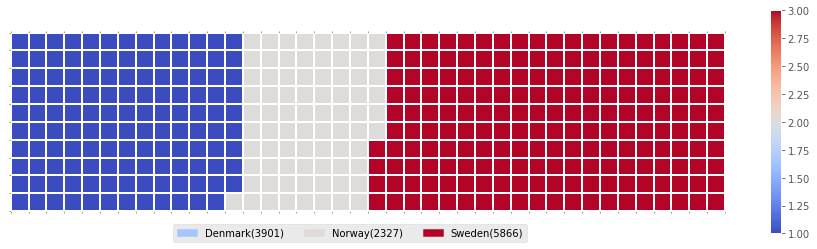

In [21]:
width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

## memanggil fungsi
create_waffle_chart(categories, values, height, width, colormap)

# Word Clouds

In [22]:
from wordcloud import WordCloud, STOPWORDS

In [23]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt
alice_novel = open('alice_novel.txt', 'r').read()

In [24]:
stopwords = set(STOPWORDS) #set digunakan untuk mengapus stopword yang berlebihan

In [25]:
alice_wc = WordCloud(
    background_color = 'white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

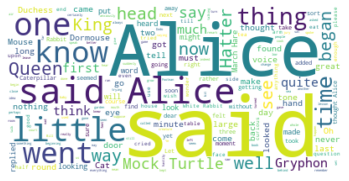

In [26]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

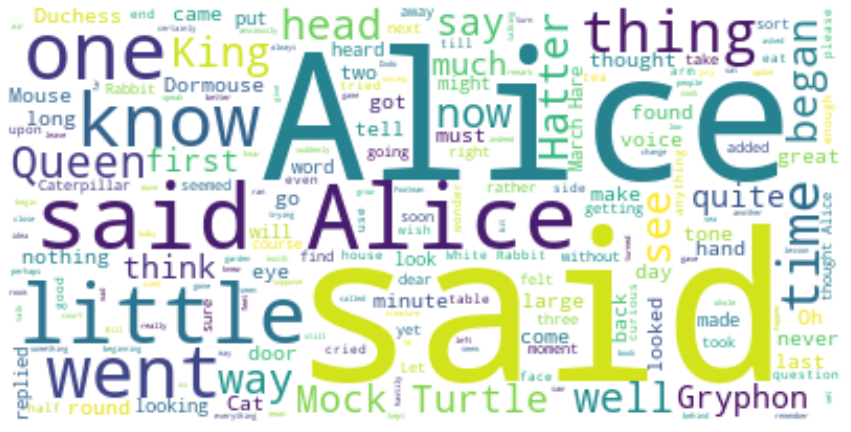

In [27]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

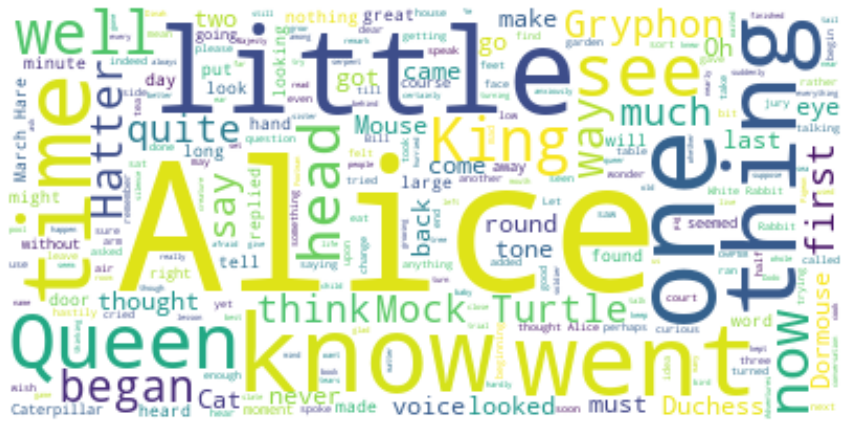

In [28]:
# menghilangkan kata yang kurang informatif (said)

stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## masking kata ke dalam gambar

In [29]:
!wget --quiet https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png -O alice_mask.png

alice_mask = np.array(Image.open('alice_mask.png'))

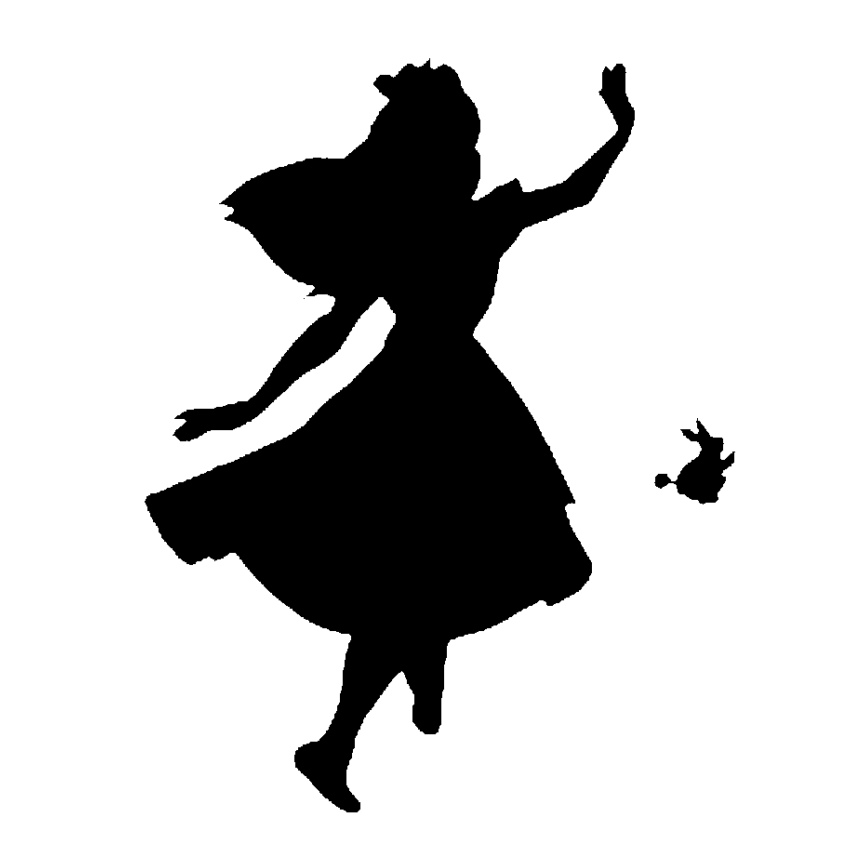

In [30]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

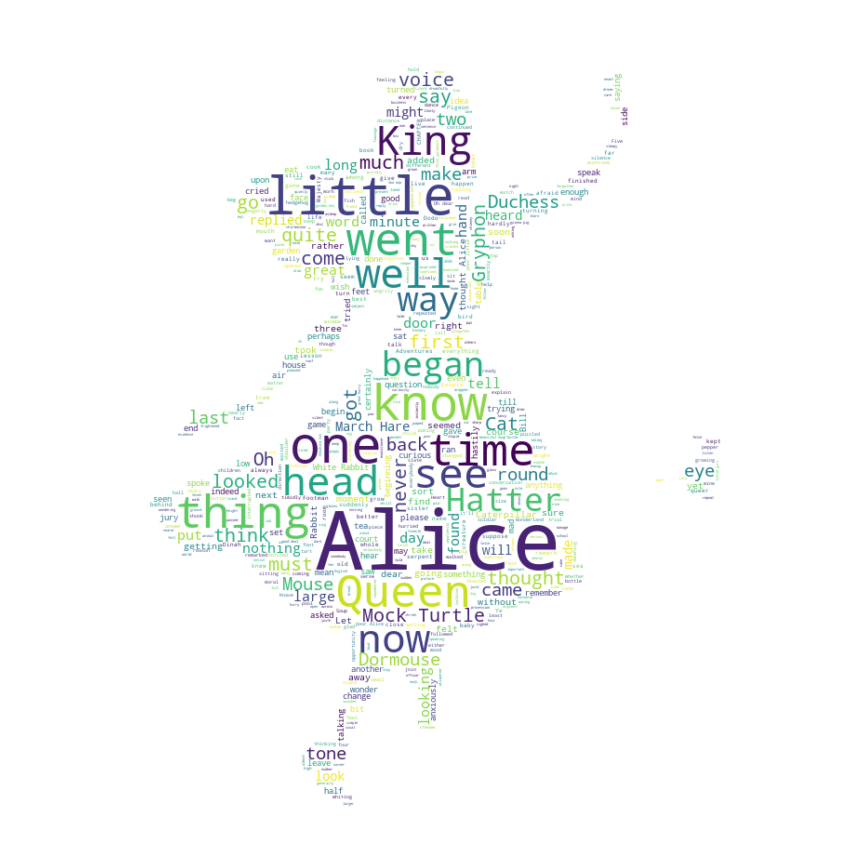

In [31]:
alice_wc = WordCloud(
    background_color = 'white',
    max_words=2000,
    mask = alice_mask,
    stopwords = stopwords
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plot

In [32]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [33]:
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Text(0.5, 1.0, 'jumlah imigrasi dari kanada 1980-2013')

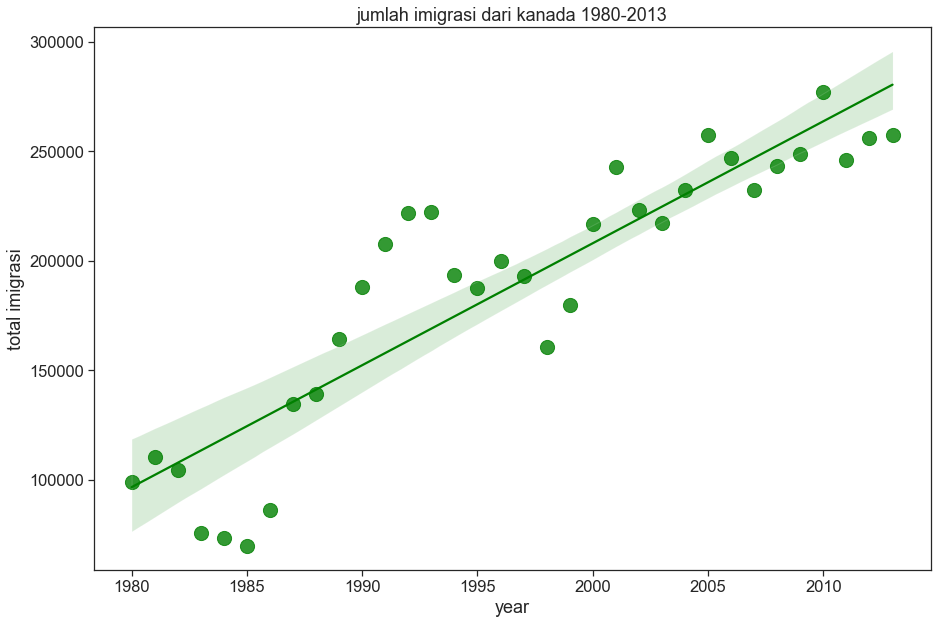

In [34]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('ticks')
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', scatter_kws={'s':200})
ax.set(xlabel='year', ylabel='total imigrasi')
ax.set_title('jumlah imigrasi dari kanada 1980-2013')

In [35]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_tot1 = pd.DataFrame(df_countries.sum(axis=1))
df_tot1.reset_index(inplace=True)
df_tot1.columns = ['year', 'total']
df_tot1['year'] = df_tot1['year'].astype(int)
df_tot1.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Text(0.5, 1.0, 'jumlah imigrasi dari denmark, norwegia, dan swedia 1980-2013')

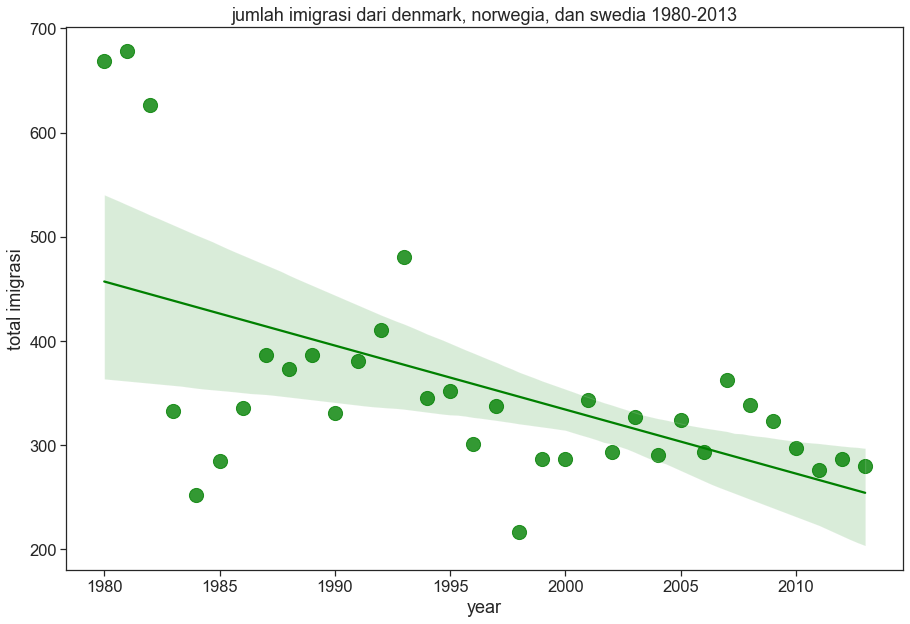

In [36]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('ticks')
ax = sns.regplot(x='year', y='total', data=df_tot1, color='green', scatter_kws={'s':200})
ax.set(xlabel='year', ylabel='total imigrasi')
ax.set_title('jumlah imigrasi dari denmark, norwegia, dan swedia 1980-2013')

# Folium
## pustaka visualisasi python yang berguna untuk membuat peta leaflet

In [37]:
import pandas as pd
import numpy as np
import folium

In [38]:
world_map = folium.Map()
world_map

In [39]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=15)
world_map

# Stamen Toner
## peta yang digunakan untuk melihat peta hitam putih

In [40]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=15, tiles='Stamen Toner')
world_map

# Stamen Terrain maps
## peta yang digunakan untuk menampilkan bayangan bukit dan warna  vegetasi alami 

In [41]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=15, tiles='Stamen Terrain')
world_map

# Maps with Markers

In [42]:
df_incident = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_incident.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [43]:
df_incident.shape

(150500, 13)

In [44]:
df_incident = df_incident.iloc[0:100, :]
df_incident.shape

(100, 13)

In [45]:
latitude = 37.77
longitude = -122.42
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [46]:
incident = folium.map.FeatureGroup()

for lat, lng in zip(df_incident.Y, df_incident.X):
    incident.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='green',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )

sanfran_map.add_child(incident)

In [47]:
incident = folium.map.FeatureGroup()

for lat, lng in zip(df_incident.Y, df_incident.X):
    incident.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='green',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6
        )
    )

#menambahkan pop-up teks
latitude = list(df_incident.Y)
longitude = list(df_incident.X)
label = list(df_incident.Category)
for lat, lng, label in zip(latitude, longitude, label):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

sanfran_map.add_child(incident)

In [50]:
latitude=37.77
longitude=-122.42
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(df_incident.Y, df_incident.X, df_incident.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        pupup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

sanfran_map
            

In [53]:
latitude=37.77
longitude=-122.42
from folium import plugins
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
incident = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df_incident.Y, df_incident.X, df_incident.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label
    ).add_to(incident)

sanfran_map

# Choropleth Maps
## peta tematik dimana peta diarsir atau berpola berdasarakan pengukuran statistik

In [54]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [59]:
df_can.reset_index(inplace=True)

In [60]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [55]:
#download country GeoJSON file
!wget -- quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json

--2021-10-12 19:28:21--  http://quiet/
Resolving quiet (quiet)... failed: No such host is known. .
wget: unable to resolve host address 'quiet'
--2021-10-12 19:28:24--  https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252515 (247K) [text/plain]
Saving to: 'world_countries.json.1'

     0K .......... .......... .......... .......... .......... 20% 1,13M 0s
    50K .......... .......... .......... .......... .......... 40%  745K 0s
   100K .......... .......... .......... .......... .......... 60%  313K 0s
   150K .......... .......... .......... .......... .......... 81%  209K 0s
   200K .......... .......... .......... .......... ......    100% 58,8K=1,3s

2021-10-12 19:28:26

In [63]:
world_geo = r'world_countries.json'

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Stamen Terrain') # tiles='Mapbox Bright' error

world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='imigrant to canada'
)

world_map